In [2]:
import pandas as pd
import numpy as np
from pandas.io.json import json_normalize
import nltk
import re
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

C:\ProgramData\Anaconda3\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [3]:
json = pd.read_json("dataset.json")

In [4]:

nltk.download('punkt')

raw_data = []

for item in json.REUTERS:
    if 'BODY' in item['TEXT']:
        raw_data.append(item['TEXT']['BODY'])


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\filip\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [5]:
data = []

for i, s in enumerate(raw_data):
    data.append(nltk.word_tokenize(raw_data[i]))

data



[['Huge',
  'oil',
  'platforms',
  'dot',
  'the',
  'Gulf',
  'like',
  'beacons',
  '--',
  'usually',
  'lit',
  'up',
  'like',
  'Christmas',
  'trees',
  'at',
  'night',
  '.',
  'One',
  'of',
  'them',
  ',',
  'sitting',
  'astride',
  'the',
  'Rostam',
  'offshore',
  'oilfield',
  ',',
  'was',
  'all',
  'but',
  'blown',
  'out',
  'of',
  'the',
  'water',
  'by',
  'U.S',
  '.',
  'Warships',
  'on',
  'Monday',
  '.',
  'The',
  'Iranian',
  'platform',
  ',',
  'an',
  'unsightly',
  'mass',
  'of',
  'steel',
  'and',
  'concrete',
  ',',
  'was',
  'a',
  'three-tier',
  'structure',
  'rising',
  '200',
  'feet',
  '(',
  '60',
  'metres',
  ')',
  'above',
  'the',
  'warm',
  'waters',
  'of',
  'the',
  'Gulf',
  'until',
  'four',
  'U.S.',
  'Destroyers',
  'pumped',
  'some',
  '1,000',
  'shells',
  'into',
  'it',
  '.',
  'The',
  'U.S.',
  'Defense',
  'Department',
  'said',
  'just',
  '10',
  'pct',
  'of',
  'one',
  'section',
  'of',
  'the',
  's

In [6]:
articles = [TaggedDocument(doc, [i]) for i, doc in enumerate(data)]
article_model = Doc2Vec(articles, vector_size=10, window=5, min_count=3, workers=4)
article_vectors = list(map(article_model.infer_vector, data))

C:\ProgramData\Anaconda3\lib\site-packages\gensim\models\base_any2vec.py:743: UserWarning: C extension not loaded, training will be slow. Install a C compiler and reinstall gensim for fast training.
  "C extension not loaded, training will be slow. "


In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
pca_result = pca.fit_transform(article_vectors)
x_pca = pca_result[:,0]
y_pca = pca_result[:,1]

essay_2d = pd.DataFrame(data={
    'x': (x_pca-min(x_pca))/(max(x_pca)-min(x_pca)),
    'y':(y_pca-min(y_pca))/(max(y_pca)-min(y_pca))
})

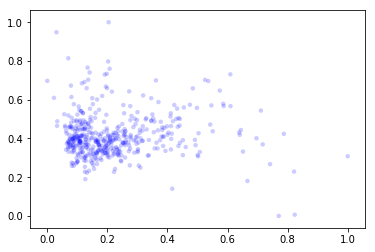

In [12]:
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

ax = plt.axes()

ax.scatter(essay_2d['x'], essay_2d['y'], alpha=0.2, c='blue', edgecolors='none', s=20)

In [10]:
def visualize_clusters(df,x,y, cluster_id):
    ax1 = plt.axes()
    colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']
    for i in range(0,9):
        ax1.scatter(
            df[x][df[cluster_id].astype('int') == i], 
            df[y][df[cluster_id].astype('int') == i], 
            alpha=1, c=colors[i],
            s=3, 
            label=i)
    ax1.scatter(
            df[x][df[cluster_id].astype('int') > 9], 
            df[y][df[cluster_id].astype('int') > 9], 
            alpha=1, c='black',
            s=3, 
            label=i)

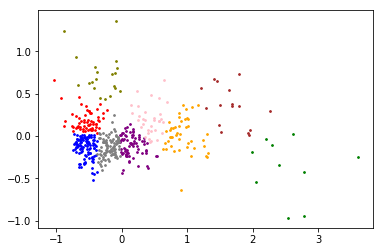

In [11]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=9).fit(article_vectors)

d = {'k_means_predicted':None, 'x':x_pca, 'y':y_pca}
df1 = pd.DataFrame(d)

df1['k_means_predicted'] = kmeans.labels_
visualize_clusters(df1, 'x', 'y', 'k_means_predicted')